# Support Vector Machines

In [1]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Read the input file 'Diabetes.csv' using Pandas and check it's column names(1 Marks)

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
cols=df.columns
cols

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Eye ball the imported dataset

### Check dimension of dataset

In [6]:
df.shape

(768, 9)

In [7]:
df.size

6912

In [8]:
df.diff()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-5.0,-63.0,-6.0,-6.0,0.0,-7.0,-0.276,-19.0,-1.0
2,7.0,98.0,-2.0,-29.0,0.0,-3.3,0.321,1.0,1.0
3,-7.0,-94.0,2.0,23.0,94.0,4.8,-0.505,-11.0,-1.0
4,-1.0,48.0,-26.0,12.0,74.0,15.0,2.121,12.0,1.0
5,5.0,-21.0,34.0,-35.0,-168.0,-17.5,-2.087,-3.0,-1.0
6,-2.0,-38.0,-24.0,32.0,88.0,5.4,0.047,-4.0,1.0
7,7.0,37.0,-50.0,-32.0,-88.0,4.3,-0.114,3.0,-1.0
8,-8.0,82.0,70.0,45.0,543.0,-4.8,0.024,24.0,1.0
9,6.0,-72.0,26.0,-45.0,-543.0,-30.5,0.074,1.0,0.0


In [9]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

### Check distribution of dependent variable, Outcome and plot it (1 Marks)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


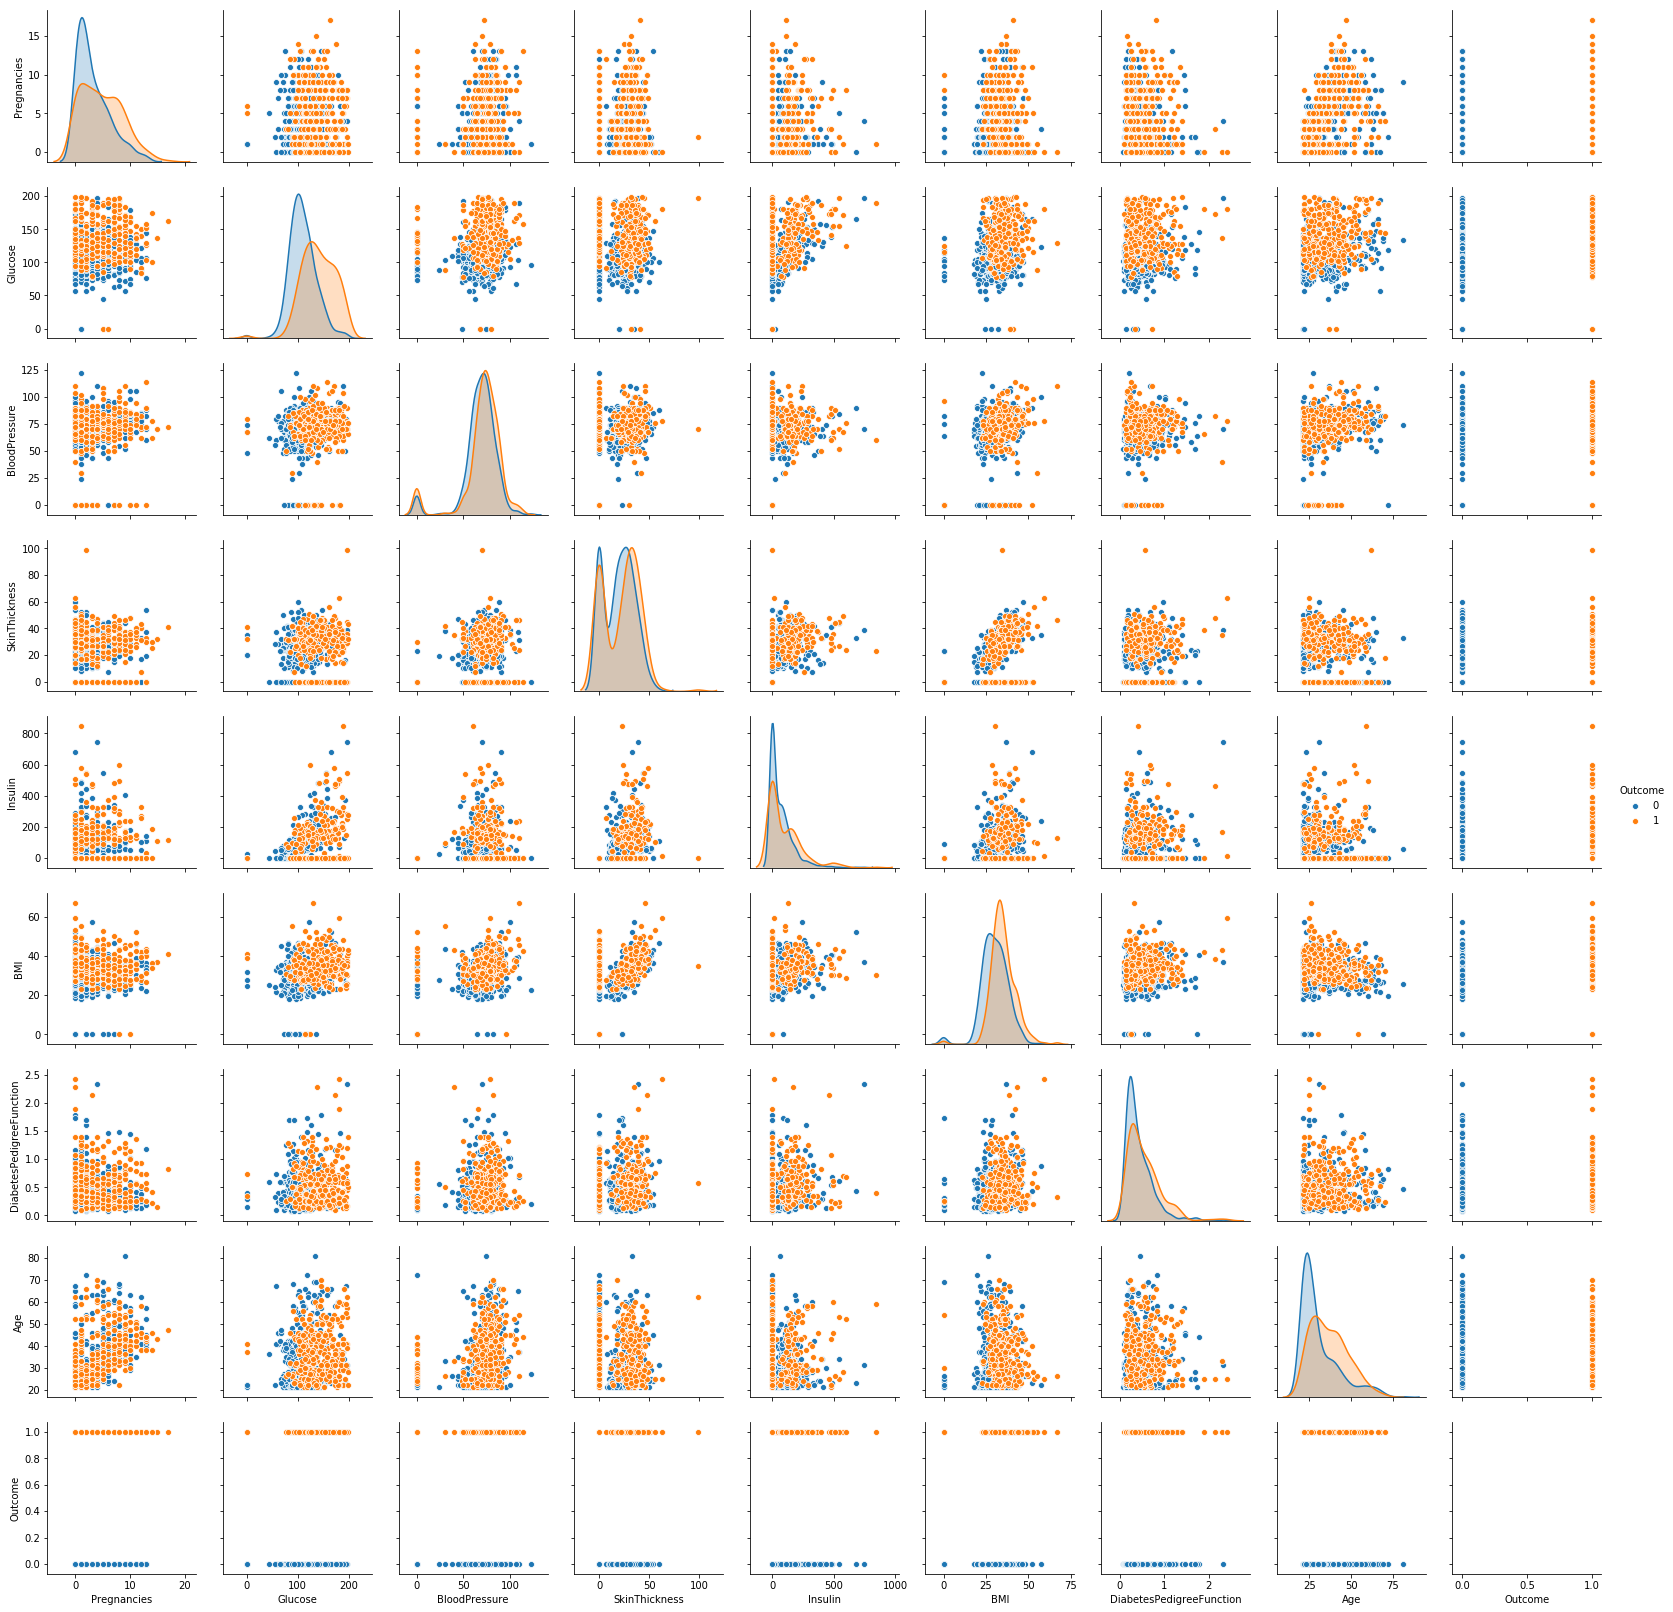

In [10]:
sns.pairplot(df,hue="Outcome",diag_kind='kde')

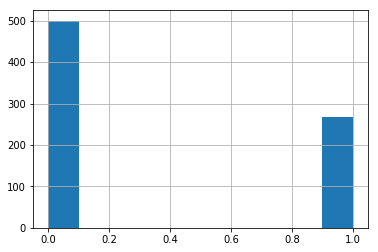

In [11]:
df["Outcome"].hist()

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [12]:
sr=pd.Series(df["Outcome"])
sr.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [13]:
# Check data types and info of dataset
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Check data distribution using summary statistics and provide your findings(2 Marks)

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Observations:
1. Pregnancies data is right skewed; Mean and Standard deviation for the variable Pregnancies is close, indicating that the most of the values close to mean.
2. Gluscode: 
3. Glucose variable mean is 120 and STD is 31.9, indicates most of the values are between 88 and 152 
4. Blood Pressure variable Mean is 69 and std is 19, indicates most of the vlaues are betwee 50 and 88
5. SkinThickness is right skewed, with a mean of 20.5 and std of 15.95
6. Insulin is also right skewed, with a mean of 79.79 and std of 115, which means the Insulin data has the highest standard deviation.  Also, the 75% quartile is at 127, but the max value is 846, indicating some outliers in the data.
7. BMI has a standard deivation of 7.88 and mean of 31.99, indicating that the mean is on the right side of the 50% quartile
8. DiabetesPedigreeFunction which indicates family history of likelyhood of Diabetes based on family history, has a mean of .33 and std of 0.078, which indicates the variable is right skewed
9. Age variable is right skewed with a max value of 81 and min value of 21.

### Do correlation analysis and bivariate viualization with Insights(1 Marks)

In [16]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Correlation Analysis:
1. None of the variables have a strong correlation with each other.
2. Age has a slight correlation with the Pregnancies variable.
3. Glucose  has a slight correlation with Outcome.
4. Blood Pressure, SkinThickness, Insulin, DiabetesPedigreeFunction doesn' have any significant correlation with other variables.
5. Insulin has slight correlation with SkinThickness.


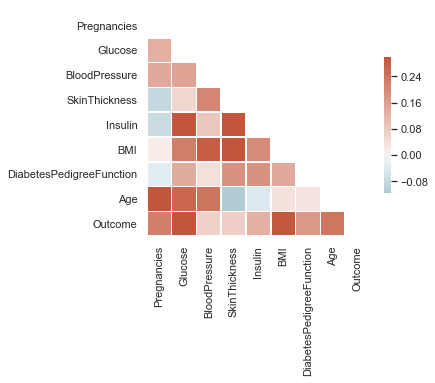

In [17]:
corr = df.corr()
sns.set(style="white")

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(5, 5))

cmap = sns.diverging_palette(220, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


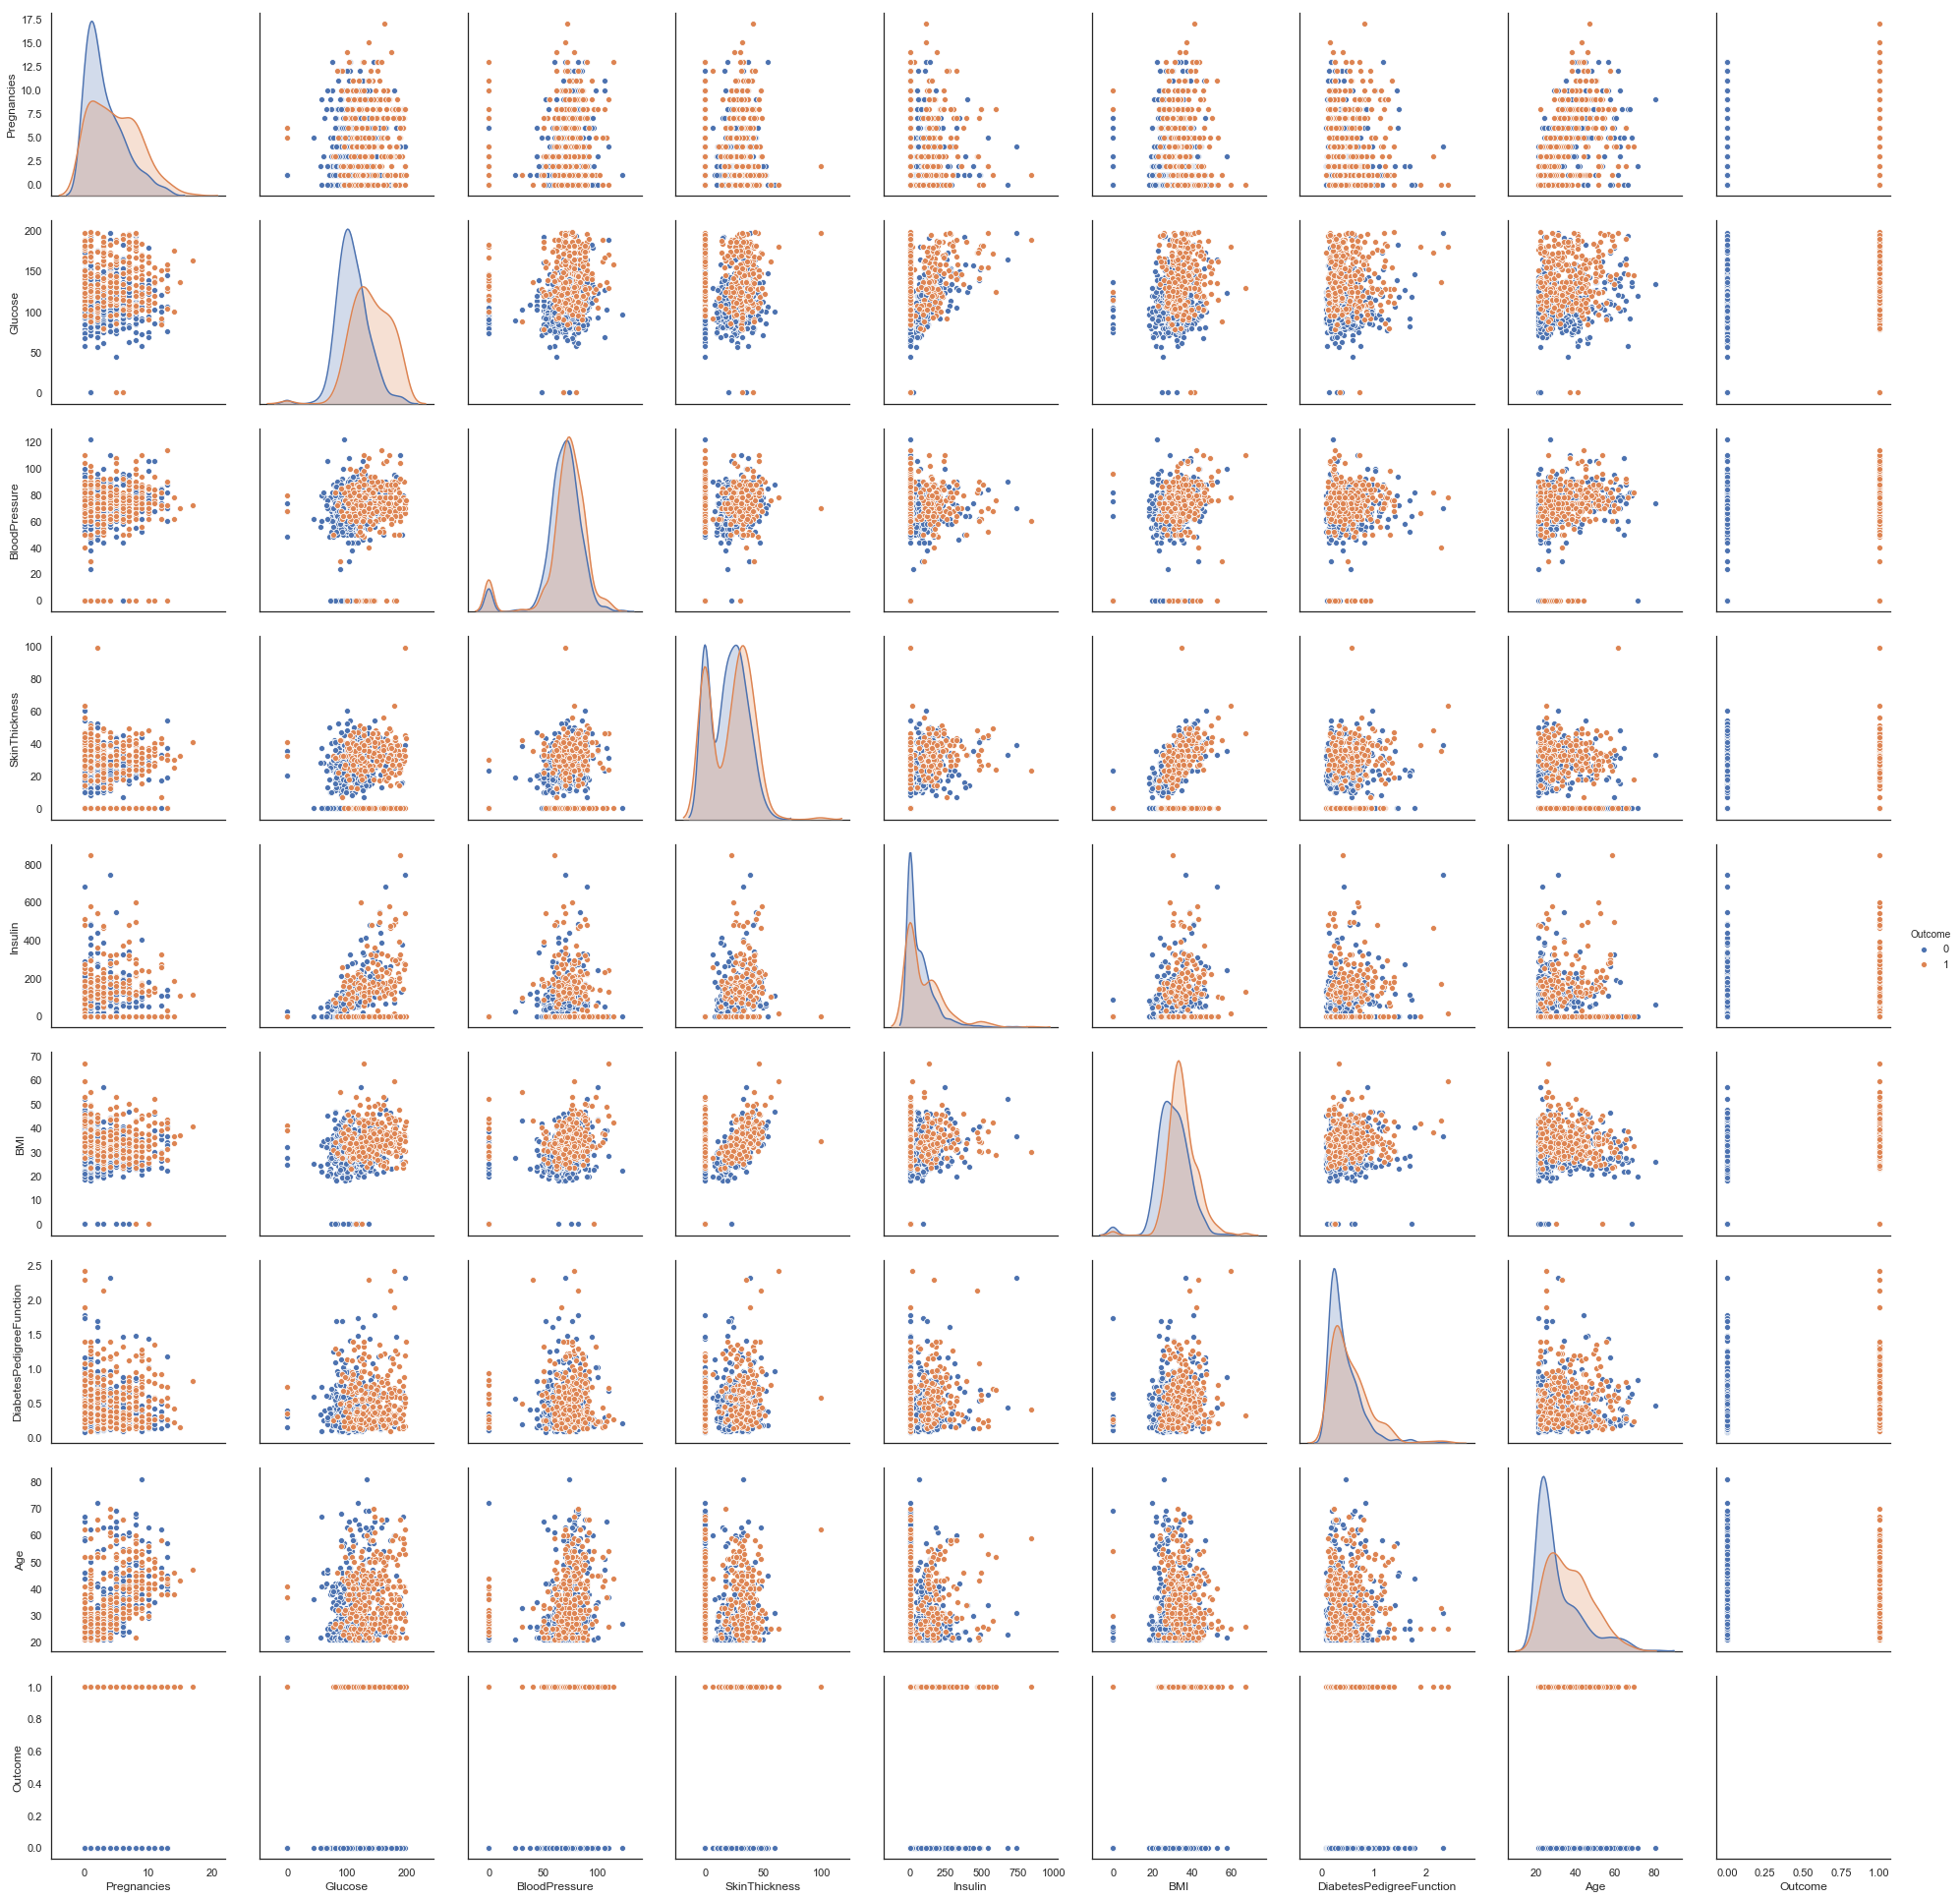

In [18]:
sns.pairplot(df,hue="Outcome",size=3)

#### Do train and test split with stratify sampling on Outcome variable to maintain the distribution of dependent variable(1 Marks)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

y = df["Outcome"]
X =df.drop(["Outcome"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)

In [20]:
X_train.shape, X_test.shape

((537, 8), (231, 8))

### Train Support Vector Machine Model(1 Marks)

In [21]:
# use from sklearn.svm import SVC
#Building the model using the linear Kernel approach with gamma =1 

from sklearn.svm import SVC
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)


In [22]:
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.7858472998137802
0.7359307359307359


In [23]:
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

Confusion Matrix:
 [[129  46]
 [ 15  41]]


In [24]:
svc_model.support_vectors_.shape

(275, 8)

# your insights
By using the linear kernel, we are able to get the model score as 78.5% for the train set and 73.59% for test set. 

### Scale the data points using MinMaxScaler ( 1 Marks)

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
scaler.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.23529412, 0.77386935, 0.59016393, ..., 0.46646796, 0.11101623,
        0.26666667],
       [0.11764706, 0.56281407, 0.70491803, ..., 0.57228018, 0.07173356,
        0.11666667],
       [0.05882353, 0.67839196, 0.44262295, ..., 0.39791356, 0.26003416,
        0.68333333],
       ...,
       [0.17647059, 0.75376884, 0.62295082, ..., 0.31296572, 0.05508113,
        0.26666667],
       [0.17647059, 0.65326633, 0.52459016, ..., 0.3442623 , 0.10076857,
        0.01666667],
       [0.        , 0.54271357, 0.55737705, ..., 0.40685544, 0.30273271,
        0.18333333]])

In [26]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
491,2,89,90,30,0,33.5,0.292,42
69,4,146,85,27,100,28.9,0.189,27
667,10,111,70,27,0,27.5,0.141,40
566,1,99,72,30,18,38.6,0.412,21
97,1,71,48,18,76,20.4,0.323,22


### Fit SVM Model on Scale data and give your observation( 1 Marks)

In [27]:
from sklearn.svm import SVC
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train_scaled, y_train)

prediction = svc_model.predict(X_test)

In [28]:
print(svc_model.score(X_train_scaled, y_train))
print(svc_model.score(X_test, y_test))
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

0.6964618249534451
0.37662337662337664
Confusion Matrix:
 [[  0   0]
 [144  87]]


The scores have decreased after the scaling.

#we can try increasing either C or gamma to fit a more complex model.

### Try improving the model accuracy using C=1000 (1 Marks)

In [29]:
from sklearn.svm import SVC
svc_model = SVC(C= 1000, kernel='linear', gamma= 1)
svc_model.fit(X_train_scaled, y_train)

prediction = svc_model.predict(X_test)

In [30]:
print(svc_model.score(X_train_scaled, y_train))
print(svc_model.score(X_test, y_test))
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

0.7877094972067039
0.37662337662337664
Confusion Matrix:
 [[  0   0]
 [144  87]]


Observation:
    The scores have been improved after using the C=1000, Initial accuracy was 78.58% and new score is 78.77% for the Traindata
    
    Increasing the C Value helped to improve the model score.

### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [31]:
from sklearn.svm import SVC
svc_model = SVC(C= 100, kernel='rbf', gamma= 1)
svc_model.fit(X_train_scaled, y_train)

prediction = svc_model.predict(X_test)

In [32]:
print(svc_model.score(X_train_scaled, y_train))
print(svc_model.score(X_test, y_test))
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

0.8528864059590316
0.37662337662337664
Confusion Matrix:
 [[  0   0]
 [144  87]]


By using the rbf kernel and C value as 100 the model score for the train data has improved to 85.28%.  
So, the model has improved the train data performance  

In [33]:
#Let's try with another model and C

from sklearn.svm import SVC
svc_model = SVC(C= 1000, kernel='sigmoid', gamma= 1)
svc_model.fit(X_train_scaled, y_train)

prediction = svc_model.predict(X_test)

print(svc_model.score(X_train_scaled, y_train))
print(svc_model.score(X_test, y_test))
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

0.4376163873370577
0.6233766233766234
Confusion Matrix:
 [[144  87]
 [  0   0]]


### The new model with sigmoid kernel and C value as 1000, hasn't improved the score.

In [34]:
#Let's try with another model and C

from sklearn.svm import SVC
svc_model = SVC(C= 1000, kernel='poly', gamma= 1)
svc_model.fit(X_train_scaled, y_train)

prediction = svc_model.predict(X_test)

print(svc_model.score(X_train_scaled, y_train))
print(svc_model.score(X_test, y_test))
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

0.8696461824953445
0.39826839826839827
Confusion Matrix:
 [[ 14   9]
 [130  78]]


# with poly kernel and C=1000, the model performance is at 86.9%

In [35]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [36]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [37]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [38]:
gs.fit(X_train_scaled, y_train) 

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=8,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [39]:
gs.best_estimator_

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [40]:
gs.best_score_ 

0.7858472998137802

# Content Based Recommendation System

**About Book Crossing Dataset**<br>

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/ 

**Objective**

This project entails building a Book Recommender System for users based on user-based and item-based collaborative filtering approaches.

#### Execute the below cell to load the datasets

In [41]:
#Loading data
books = pd.read_csv("books/books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

users = pd.read_csv('books/users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv('books/ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.p

### Check no.of records and features given in each dataset

In [42]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
ISBN                 271360 non-null object
bookTitle            271360 non-null object
bookAuthor           271359 non-null object
yearOfPublication    271360 non-null object
publisher            271358 non-null object
imageUrlS            271360 non-null object
imageUrlM            271360 non-null object
imageUrlL            271357 non-null object
dtypes: object(8)
memory usage: 16.6+ MB


1. There are total 271360 records in books dataset and all the features are non-numerical data
2. Feature "bookAuthor"  has only 271359 records, indicates there is some missing data.
3. Feature "publisher" has only 271358 records, indicates there is some missing data.
4. Feature "imageUrlL" also didn't have data for 3 records.



In [43]:
books[books.imageUrlL.isnull()==True]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [44]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
userID      278858 non-null int64
Location    278858 non-null object
Age         168096 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


### Dataset Users has total 278858 records, but it doesn't have Age data for all the users. 


In [45]:
users[users.Age.isna()].shape

(110762, 3)

### Total number of records with missing value for Age variable is 110762

In [46]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
userID        1149780 non-null int64
ISBN          1149780 non-null object
bookRating    1149780 non-null int64
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [47]:
ratings.shape

(1149780, 3)

## Exploring books dataset

In [48]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### Drop last three columns containing image URLs which will not be required for analysis

In [49]:
books.shape

(271360, 8)

In [50]:
books=books.drop(['imageUrlS', "imageUrlM","imageUrlL"], axis=1)

In [51]:
books.shape

(271360, 5)

**yearOfPublication**

### Check unique values of yearOfPublication


In [52]:
books.yearOfPublication.nunique()

202

There are 202 unique values in yearOfPublication

In [53]:
books.nunique()

ISBN                 271360
bookTitle            242135
bookAuthor           102023
yearOfPublication       202
publisher             16807
dtype: int64

As it can be seen from above that there are some incorrect entries in this field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as yearOfPublication in dataset due to some errors in csv file.


Also some of the entries are strings and same years have been entered as numbers in some places. We will try to fix these things in the coming questions.

### Check the rows having 'DK Publishing Inc' as yearOfPublication

In [54]:
books.loc[books['yearOfPublication'] == 'DK Publishing Inc']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


### Drop the rows having `'DK Publishing Inc'` and `'Gallimard'` as `yearOfPublication`

In [55]:
books = books[books.yearOfPublication!='DK Publishing Inc']

In [56]:
books = books[books.yearOfPublication!='Gallimard']
books.shape

(271357, 5)

### Change the datatype of yearOfPublication to 'int'

In [57]:
books[["yearOfPublication"]] = books[["yearOfPublication"]].apply(pd.to_numeric)

In [58]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication     int64
publisher            object
dtype: object

### Drop NaNs in `'publisher'` column


In [59]:
books=books.dropna(subset=['publisher'])
books.shape

(271355, 5)

## Exploring Users dataset

In [60]:
print(users.shape)
users.head()

(278858, 3)


,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Get all unique values in ascending order for column `Age`

In [61]:
print(sorted(users['Age'].unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

Age column has some invalid entries like nan, 0 and very high values like 100 and above

### Values below 5 and above 90 do not make much sense for our book rating case...hence replace these by NaNs

In [62]:
users.loc[users["Age"] > 90] = np.nan
users.loc[users["Age"] < 5] = np.nan


In [63]:
print(sorted(users['Age'].unique()))

[nan, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0]


### Replace null values in column `Age` with mean

In [64]:
#users["Age"].fillna(users["Age"].mean())
users.Age.mean()
users.Age.fillna(users.Age.mean(),inplace=True)

In [65]:
print(sorted(users['Age'].unique()))

[5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 34.72384041634689, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0]


### Change the datatype of `Age` to `int`

In [66]:
users['Age'] = users['Age'].astype(np.int64)

In [67]:
print(sorted(users.Age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


## Exploring the Ratings Dataset

### check the shape

In [68]:
ratings.shape

(1149780, 3)

In [69]:
n_users = users.shape[0]
n_books = books.shape[0]

In [70]:
ratings.head(5)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Ratings dataset should have books only which exist in our books dataset. Drop the remaining rows

In [71]:
bookitems=books.ISBN.unique()
bookitems

array(['0195153448', '0002005018', '0060973129', ..., '006008667X',
       '0192126040', '0767409752'], dtype=object)

In [72]:
ratings[ratings['ISBN'].isin(bookitems)].head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [73]:
ratings.drop(ratings[~ratings['ISBN'] .isin(bookitems)].index, inplace = True)
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Ratings dataset should have ratings from users which exist in users dataset. Drop the remaining rows

In [74]:
userslist=users.userID.unique()

In [75]:
ratings[ratings['userID'].isin(userslist)].head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [76]:
ratings.drop(ratings[~ratings['userID'] .isin(userslist)].index, inplace = True)
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [77]:
ratings.shape

(1026151, 3)

### Consider only ratings from 1-10 and leave 0s in column `bookRating`

In [78]:
ratings.bookRating.unique()

array([ 0,  5,  3,  6,  7,  9,  8, 10,  1,  4,  2], dtype=int64)

In [79]:
ratings.drop(ratings[ratings['bookRating']==0].index, inplace = True)
ratings.bookRating.unique()

array([ 5,  3,  6,  7,  9,  8, 10,  1,  4,  2], dtype=int64)

### Find out which rating has been given highest number of times

In [80]:
sr=pd.Series(ratings["bookRating"])
sr.value_counts()

8     91365
10    70963
7     66101
9     60497
5     45154
6     31551
4      7576
3      5082
2      2360
1      1465
Name: bookRating, dtype: int64

# rating 8 has the highest number of times

### **Collaborative Filtering Based Recommendation Systems**

### For more accurate results only consider users who have rated atleast 100 books

In [81]:
sr=pd.Series(ratings["userID"])
sr.value_counts()

11676     6943
98391     5689
189835    1899
153662    1845
23902     1180
235105    1020
76499     1012
171118     962
16795      959
248718     941
56399      837
197659     781
35859      777
185233     698
95359      606
114368     603
158295     567
101851     563
177458     524
204864     504
93047      501
69078      499
182085     498
135149     487
100906     484
107784     482
78973      479
23872      478
60244      476
257204     475
          ... 
260876       1
232194       1
234241       1
262899       1
269040       1
89029        1
6768         1
82886        1
162620       1
179129       1
38103        1
185268       1
24813        1
242584       1
89326        1
27518        1
31612        1
17275        1
152484       1
883          1
54121        1
56168        1
189362       1
43878        1
45925        1
35682        1
86873        1
88920        1
80724        1
205028       1
Name: userID, Length: 67796, dtype: int64

In [82]:
v_counts=sr.value_counts()
v_counts
df = v_counts.rename_axis('userID').reset_index(name='counts')

df.head()

,userID,counts
0,11676,6943
1,98391,5689
2,189835,1899
3,153662,1845
4,23902,1180


In [83]:
df.drop(df[df['counts']>100].index, inplace = True)


In [84]:
highest_rated_users=df.userID.unique()
highest_rated_users

array([211919, 208406, 156300, ...,  88920,  80724, 205028], dtype=int64)

In [85]:
final_ratings=ratings[ratings['userID'].isin(highest_rated_users)]
final_ratings.shape

(280039, 3)

### Generating ratings matrix from explicit ratings


#### Note: since NaNs cannot be handled by training algorithms, replace these by 0, which indicates absence of ratings

In [86]:
final_ratings=final_ratings.fillna(0)
final_ratings.head()

,userID,ISBN,bookRating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
8,276744,038550120X,7
16,276747,0060517794,9


### Generate the predicted ratings using SVD with no.of singular values to be 50

In [94]:
from surprise import Dataset,Reader
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(final_ratings[['userID', 'ISBN', 'bookRating']], reader)


In [97]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.25,random_state=123)

In [100]:
final_ratings.shape

(280039, 3)

In [101]:

from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.25,random_state=123)

In [103]:
from surprise import SVD
from surprise import accuracy

In [104]:
svd_model = SVD(n_factors=50,biased=False)
svd_model.fit(trainset)

In [105]:
test_pred = svd_model.test(testset)

In [106]:
test_pred_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in test_pred])

In [107]:
test_pred_df.head()

,0,1,2
0,147803,0586090134,5.000000
1,125514,0812234715,5.000000
2,249708,0590448595,5.000000
3,32087,0515119784,4.219993
4,13518,0553273299,1.141703


In [109]:
test_pred_df.columns = ["userID","ISBN","bookRating"]
test_pred_df.sort_values(by = ["userID", "bookRating"],ascending=False,inplace=True)

In [111]:
test_pred_df.head(50)

,userID,ISBN,bookRating
40024,278854,0553579606,1.259681
36487,278851,0767907566,5.000000
11421,278851,0380865610,1.000000
25653,278851,0439050006,1.000000
39186,278851,1885071213,1.000000
6903,278846,0060809833,5.000000
60181,278844,0345387651,1.000000
26208,278843,0060517794,4.634565
55893,278843,0385260075,2.494272
60846,278831,0449205193,5.000000


In [113]:
top_50_recos = test_pred_df.groupby("userID").head(50).reset_index(drop=True)

In [115]:
top_50_recos


,userID,ISBN,bookRating
0,278854,0553579606,1.259681
1,278851,0767907566,5.000000
2,278851,0380865610,1.000000
3,278851,0439050006,1.000000
4,278851,1885071213,1.000000
5,278846,0060809833,5.000000
6,278844,0345387651,1.000000
7,278843,0060517794,4.634565
8,278843,0385260075,2.494272
9,278831,0449205193,5.000000


In [116]:
accuracy.rmse(test_pred)


RMSE: 4.8565


4.856509027673031

### Take a particular user_id

### Lets find the recommendations for user with id `2110`

#### Note: Execute the below cells to get the variables loaded

In [ ]:
userID = 2110

In [ ]:
user_id = 2 #2nd row in ratings matrix and predicted matrix

### Get the predicted ratings for userID `2110` and sort them in descending order

### Create a dataframe with name `user_data` containing userID `2110` explicitly interacted books

In [ ]:
user_data.head()

In [ ]:
user_data.shape

### Combine the user_data and and corresponding book data(`book_data`) in a single dataframe with name `user_full_info`

In [ ]:
book_data.shape

In [ ]:
book_data.head()

In [ ]:
user_full_info.head()

### Get top 10 recommendations for above given userID from the books not already rated by that user